### Our Goals
detect Fraud operation

<h1>Introduction</h1>
<p>In this notebook we will try to train different models to find the best suit model for accurately detecting Fraud transactions. The features are scaled and the names are hidden except Time and Amount due to privay issues. We will try different solutions to deal with imbalancing in data. Let's start! </p>

<h2>Our Goals:</h2>
<ul>
<li>Understand the little distribution of the "little" data that was provided to us.</li>
<li>Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions. (NearMiss Algorithm)</li>
<li>Determine the Classifiers we are going to use and decide which one has a higher accuracy.</li>
<li>Create a Neural Network and compare the accuracy to our best classifier.</li>
<li>Understand common mistakes made with imbalanced datasets.</li>
</ol>

</body>
</html>

#### Load and discover data

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = '../data/train.csv'

In [252]:
df = pd.DataFrame(pd.read_csv(path))

In [253]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [254]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,...,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,94966.107886,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,...,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,88.511723,0.001785
std,47464.723773,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,...,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,256.737144,0.042210
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54348.000000,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,...,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,5.637500,0.000000
50%,84923.500000,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,...,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,22.020000,0.000000
75%,139404.000000,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,...,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,77.650000,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


In [19]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

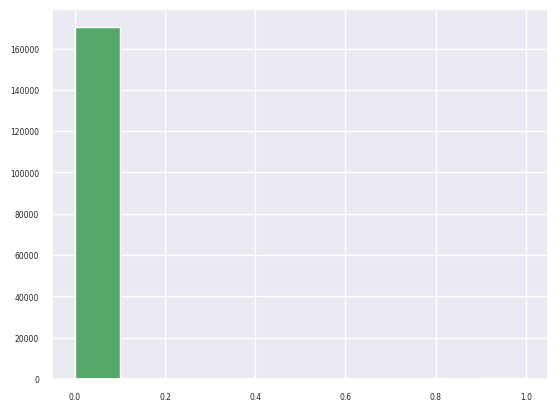

In [257]:
def freq(col):
    plt.hist(col, color='g')

freq(df['Class'])

We see that the distribution of the target class is huge biased to Non-Fraud transactions

In [31]:
df['Time']

0         119191.0
1          71750.0
2         151977.0
3          55709.0
4          66654.0
            ...   
170879    137874.0
170880      6559.0
170881    159020.0
170882     34859.0
170883    130876.0
Name: Time, Length: 170884, dtype: float64

In [243]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['Scaled_Amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Scaled_Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

In [247]:
df = pd.DataFrame(pd.read_csv(path))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd08d6b5e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd08d6b4e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd08d6b7b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd0912db710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd0912db610>],
 'means': []}

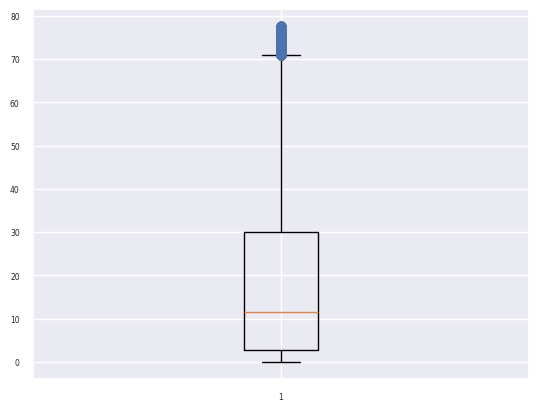

In [241]:
plt.boxplot(df['Amount'].values, sym='bo')

In [248]:
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
# df = df.loc[(df["Amount"] < q3)] & (df["Amount"] >= q1)]

In [212]:
df['Amount'].count()

170884

In [249]:
def dists(df):
    amount = df['Amount'].values
    time = df['Time'].values
    
    sns.displot(amount, color='green', kde=True)
    
    sns.displot(time, color='blue', kde=True)

    plt.show()

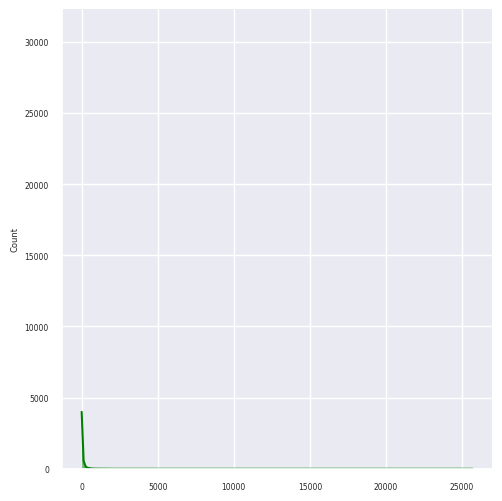

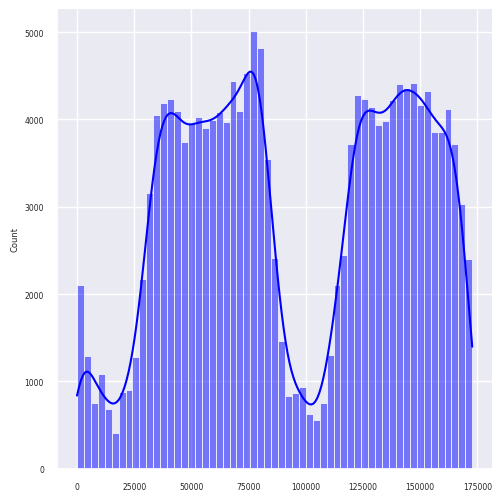

In [250]:
dists(df)